In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
result_f = open("./ott.txt",encoding='UTF-8')   # 파일 열기

list_arr = [ line.strip().split(' ')[-5: ] for line in result_f ]
list_arr[1:]

[['289', '457', '902', '2,221', '3,835'],
 ['-', '-', '-', '1,614', '2,102'],
 ['338', '403', '542', '802', '1,781'],
 ['765', '883', '1,085', '1,173', '1,299'],
 ['580', '685', '736', '791', '1,081'],
 ['554', '718', '749', '762', '729'],
 ['-', '12', '59', '141', '262'],
 ['1', '7', '8', '26', '39'],
 ['22', '22', '22', '21', '19'],
 ['4', '5', '12', '14', '17'],
 ['-', '-', '-', '-', '5'],
 ['-', '-', '-', '1', '1'],
 ['1,521', '1,789', '1,992', '-', '-'],
 ['530', '630', '709', '-', '-'],
 ['57', '77', '102', '144', '182']]

In [3]:
df = pd.DataFrame(list_arr[1:], columns=[ str(i) for i in range(2016, 2021)])
df
# for line in result_f:                                  # 각 줄 내용 출력하기
#     print(line.strip().split(' ')[-5: ])

,2016,2017,2018,2019,2020
0,289,457,902,"2,221","3,835"
1,-,-,-,"1,614","2,102"
2,338,403,542,802,"1,781"
3,765,883,"1,085","1,173","1,299"
4,580,685,736,791,"1,081"
5,554,718,749,762,729
6,-,12,59,141,262
7,1,7,8,26,39
8,22,22,22,21,19
9,4,5,12,14,17


In [4]:
import numpy as np

In [5]:
df.replace({'-' : np.NaN}, inplace=True)   #  '-' -> NaN으로 대체
df

,2016,2017,2018,2019,2020
0,289,457,902,"2,221","3,835"
1,NaN,NaN,NaN,"1,614","2,102"
2,338,403,542,802,"1,781"
3,765,883,"1,085","1,173","1,299"
4,580,685,736,791,"1,081"
5,554,718,749,762,729
6,NaN,12,59,141,262
7,1,7,8,26,39
8,22,22,22,21,19
9,4,5,12,14,17


In [6]:
df.fillna(0, inplace=True)   # NaN을 0로
df

,2016,2017,2018,2019,2020
0,289,457,902,"2,221","3,835"
1,0,0,0,"1,614","2,102"
2,338,403,542,802,"1,781"
3,765,883,"1,085","1,173","1,299"
4,580,685,736,791,"1,081"
5,554,718,749,762,729
6,0,12,59,141,262
7,1,7,8,26,39
8,22,22,22,21,19
9,4,5,12,14,17


In [7]:
for row in df.index:    
    for col in df.columns:  
        if df.loc[row,col]:
            df.loc[row,col] = re.sub(r'[^0-9]', '', df.loc[row,col])    # 1,521 -> 1521로 숫자만 추출
        else:
            df.loc[row,col] = 0

In [8]:
df = df.astype(int)   # object -> int로 

In [49]:
df

,2016,2017,2018,2019,2020
0,289,457,902,2221,3835
1,0,0,0,1614,2102
2,338,403,542,802,1781
3,765,883,1085,1173,1299
4,580,685,736,791,1081
5,554,718,749,762,729
6,0,12,59,141,262
7,1,7,8,26,39
8,22,22,22,21,19
9,4,5,12,14,17


In [47]:
tdf = df.T
tdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2016,289,0,338,765,580,554,0,1,22,4,0,0,1521,530,57
2017,457,0,403,883,685,718,12,7,22,5,0,0,1789,630,77
2018,902,0,542,1085,736,749,59,8,22,12,0,0,1992,709,102
2019,2221,1614,802,1173,791,762,141,26,21,14,0,1,0,0,144
2020,3835,2102,1781,1299,1081,729,262,39,19,17,5,1,0,0,182


In [62]:
df_sum = [sum(df[col]) for col in df.columns]
df.loc['OTT 서비스 이용자 수']  = df_sum

In [63]:
df

,2016,2017,2018,2019,2020
0,289,457,902,2221,3835
1,0,0,0,1614,2102
2,338,403,542,802,1781
3,765,883,1085,1173,1299
4,580,685,736,791,1081
5,554,718,749,762,729
6,0,12,59,141,262
7,1,7,8,26,39
8,22,22,22,21,19
9,4,5,12,14,17


In [65]:
sdf = df.loc['OTT 서비스 이용자 수']
sdf

2016     4661
2017     5688
2018     6918
2019     7710
2020    11352
Name: OTT 서비스 이용자 수, dtype: int64

Text(0.5, 1.0, 'OTT 서비스 이용자 수 추이')

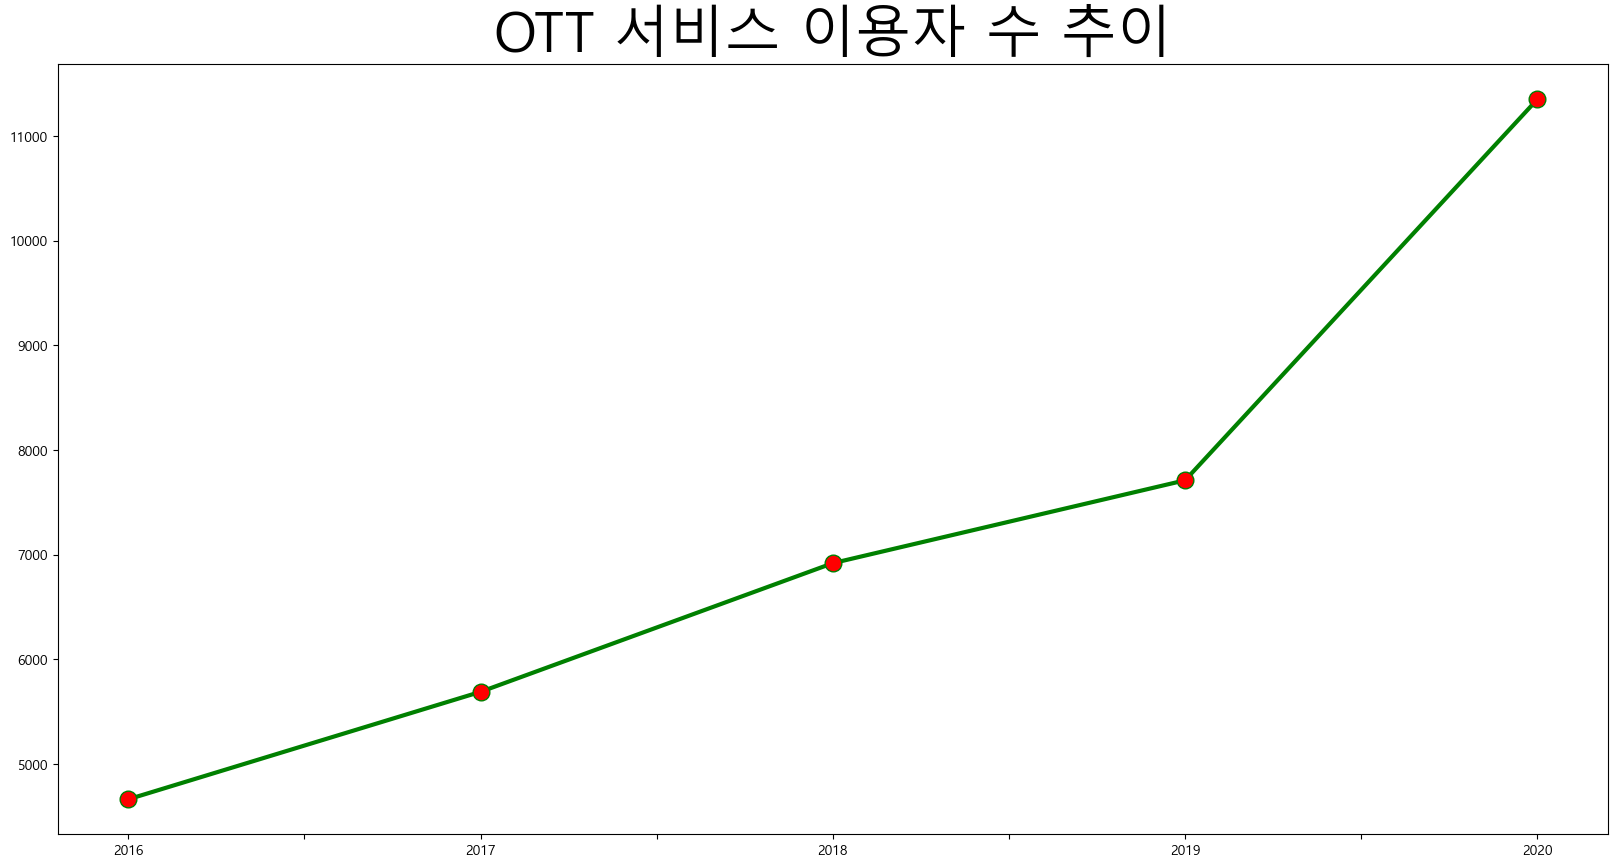

In [79]:
fig = plt.figure(figsize = (20,10))
sdf.plot(kind ='line', figsize = (20,10), marker = 'o', markerfacecolor = 'red', markersize = 12, color= 'green', linewidth = 3 )
plt.title('OTT 서비스 이용자 수 추이', fontsize = 40)